In [2]:
import pandas as pd
import pickle
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import shap
import numpy as np
import pandas as pd

In [3]:

datafile = "20_input_features.xlsx"

df = pd.read_excel(datafile)

with open('20_feat_NGB_model.pkl', 'rb') as file:
    NGB_model = pickle.load(file)

X = df.drop(['Formulation_Number', 'Drug_Lipid_Group','Release'], axis='columns')
y = df['Release']

In [4]:
stdScale = StandardScaler().fit(X)
X_scale = stdScale.transform(X)

In [5]:
NGB_model 

NGBRegressor(Base=DecisionTreeRegressor(max_depth=2), col_sample=0.8,
             learning_rate=0.1, minibatch_frac=0.8, n_estimators=600,
             random_state=RandomState(MT19937) at 0x2479BA28040)

In [6]:
bestModel =  NGB_model 
bestModel.fit(X, y)
explainer = shap.TreeExplainer( NGB_model )
shap_values = explainer(X)

[iter 0] loss=4.7405 val_loss=0.0000 scale=1.0000 norm=23.3804
[iter 100] loss=1.7046 val_loss=0.0000 scale=0.5000 norm=0.7715
[iter 200] loss=1.4721 val_loss=0.0000 scale=0.2500 norm=0.3138
[iter 300] loss=1.4009 val_loss=0.0000 scale=0.5000 norm=0.5971
[iter 400] loss=1.2888 val_loss=0.0000 scale=0.2500 norm=0.2761
[iter 500] loss=1.2099 val_loss=0.0000 scale=0.5000 norm=0.5133


c:\Users\Afra\AppData\Local\Programs\Python\Python39\lib\site-packages\shap\explainers\_tree.py:1185: UserWarning: Translating model_output="raw" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.
  warnings.warn("Translating model_output=\"raw\" to model_output=0 for the 0-th parameter in the distribution. Use model_output=0 directly to avoid this warning.")


In [6]:
shap_values

.values =
array([[ 0.03021766,  0.39620078, -0.71284053, ...,  0.11199564,
         0.05844362, -0.04609789],
       [ 0.04489601,  0.54632875, -0.90528869, ...,  0.14094806,
         0.0585678 , -0.00390545],
       [ 0.04489601,  1.00780688, -0.90528869, ...,  0.14094806,
         0.05950766, -0.00390545],
       ...,
       [-0.1597586 , -0.30896193, -1.65333723, ..., -0.14464492,
         0.03602708,  0.01031121],
       [-0.16026138, -0.30943783, -1.69965256, ..., -0.13574346,
         0.03362565,  0.01031121],
       [-0.24830575, -0.33231279, -2.83046709, ..., -0.0058282 ,
        -0.02468557,  0.01031121]])

.base_values =
array([33.71393622, 33.71393622, 33.71393622, 33.71393622, 33.71393622,
       33.71393622, 33.71393622, 33.71393622, 33.71393622, 33.71393622,
       33.71393622, 33.71393622, 33.71393622, 33.71393622, 33.71393622,
       33.71393622, 33.71393622, 33.71393622, 33.71393622, 33.71393622,
       33.71393622, 33.71393622, 33.71393622, 33.71393622, 33.71393622,
 

In [7]:
shap_values_dataframe = pd.DataFrame(shap_values.values, columns=X.columns)

In [8]:
X.head()

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
0,543.5,0.2,242.1,35.1,52.5,48,4.2,0,0,0,...,15.0,0.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
1,543.5,0.2,242.1,35.1,52.5,48,4.2,0,0,0,...,15.0,0.6,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
2,543.5,0.2,242.1,35.1,52.5,48,4.2,0,0,0,...,15.0,1.2,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
3,543.5,0.2,242.1,35.1,52.5,48,4.2,0,0,0,...,15.0,1.8,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
4,543.5,0.2,242.1,35.1,52.5,48,4.2,0,0,0,...,15.0,2.4,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013


In [9]:
shap_values_dataframe.head()

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
0,0.041435,0.086488,-0.664431,0.834711,-0.363832,0.599578,-1.444786,0.00886,0.003962,-0.061532,...,3.802518,-38.535211,-0.080487,-0.034985,-0.039726,0.034162,0.093403,0.137743,0.090997,-0.041067
1,0.022240,0.241367,-0.844111,0.854585,-0.085089,0.703511,-1.840696,0.00886,0.003962,0.035695,...,5.376074,-31.906259,-0.078805,0.000272,-0.039726,0.042157,0.132495,0.150224,0.092197,0.023744
2,0.022240,0.702845,-0.844111,0.854585,-0.093120,0.703511,-1.840696,0.00886,0.003962,0.035695,...,6.023587,-26.882957,-0.048718,0.000272,-0.039726,0.042157,0.132495,0.150224,0.092197,0.023744
3,0.022240,0.702845,-0.844111,0.856263,-0.057500,0.703511,-1.861836,0.00886,0.003962,0.035695,...,5.998593,-23.925647,-0.048718,0.000272,-0.029725,0.042157,0.132495,0.150224,0.092197,0.023744
4,0.022240,0.701836,-0.835088,0.850591,-0.024885,0.692922,-1.863555,0.00886,0.003962,0.035549,...,6.860979,-20.782839,-0.052915,-0.001924,-0.055232,0.040191,0.132495,0.149830,0.092197,0.005240


Global bar plot



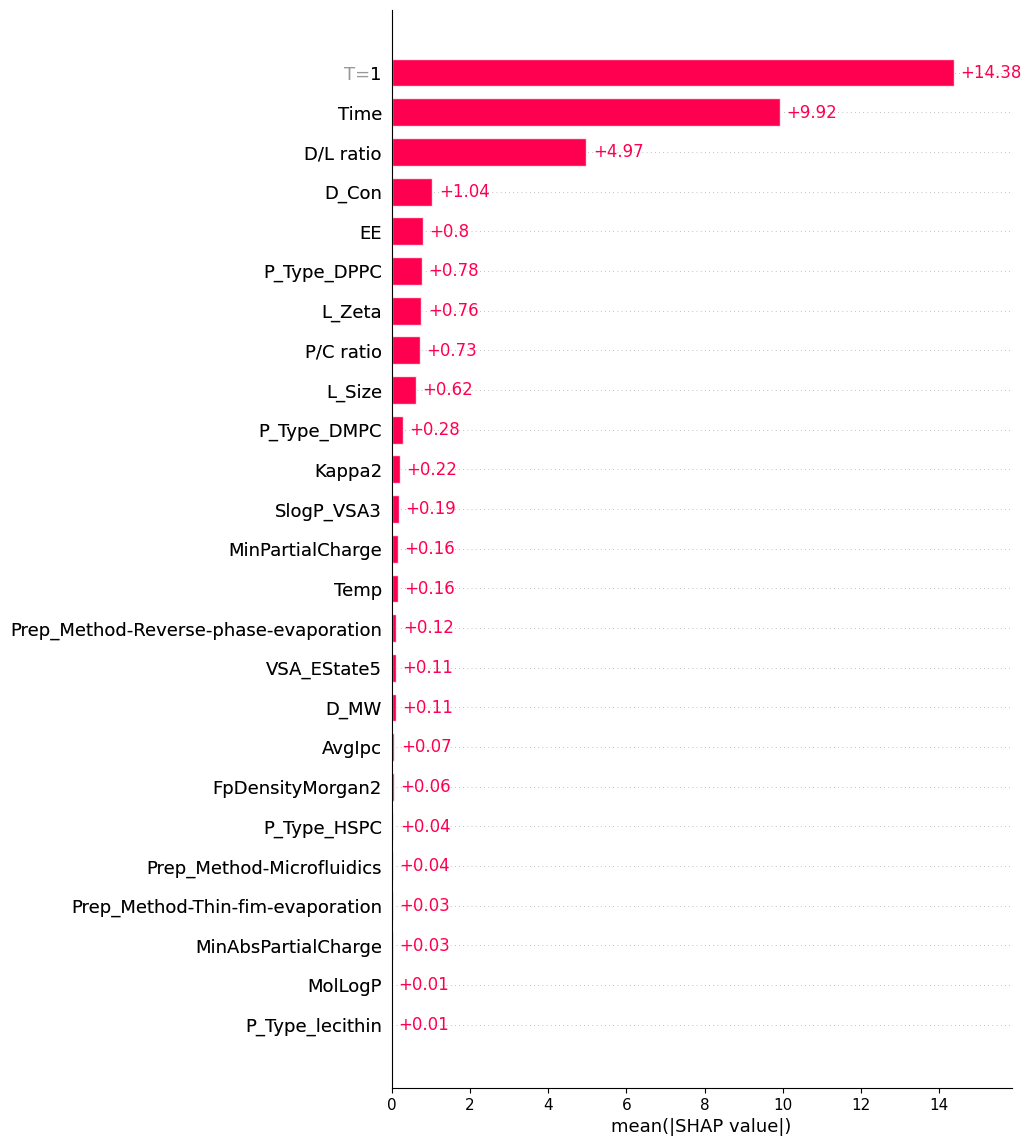

<Figure size 640x480 with 0 Axes>

In [12]:
shap.plots.bar(shap_values, max_display=25)
plt.savefig('ArticleFigures/Globalbarplot', dpi=600, format='png',
            transparent=True, bbox_inches='tight')

beeswarm plot

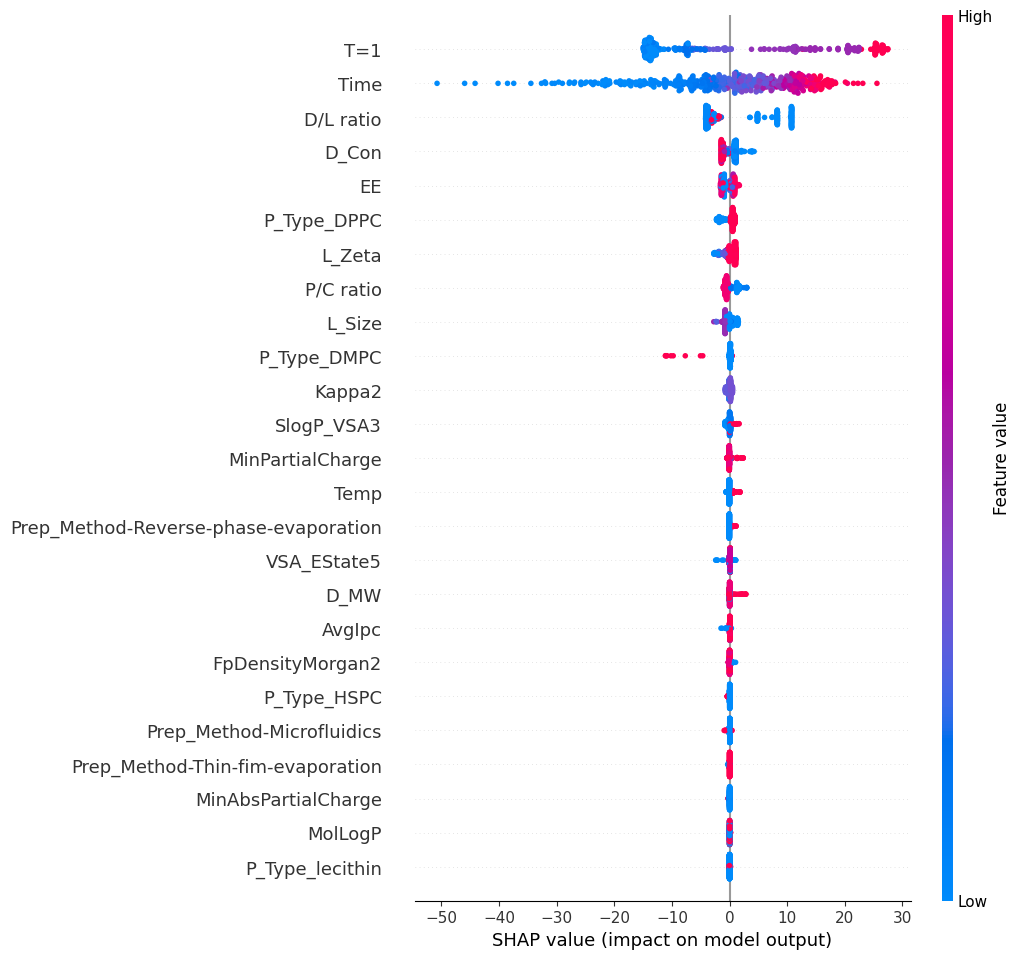

<Figure size 640x480 with 0 Axes>

In [11]:
shap.plots.beeswarm(shap_values, max_display=25)
plt.savefig('ArticleFigures/beeswarm1', dpi=600, format='png',
            transparent=True, bbox_inches='tight')

decision_plot

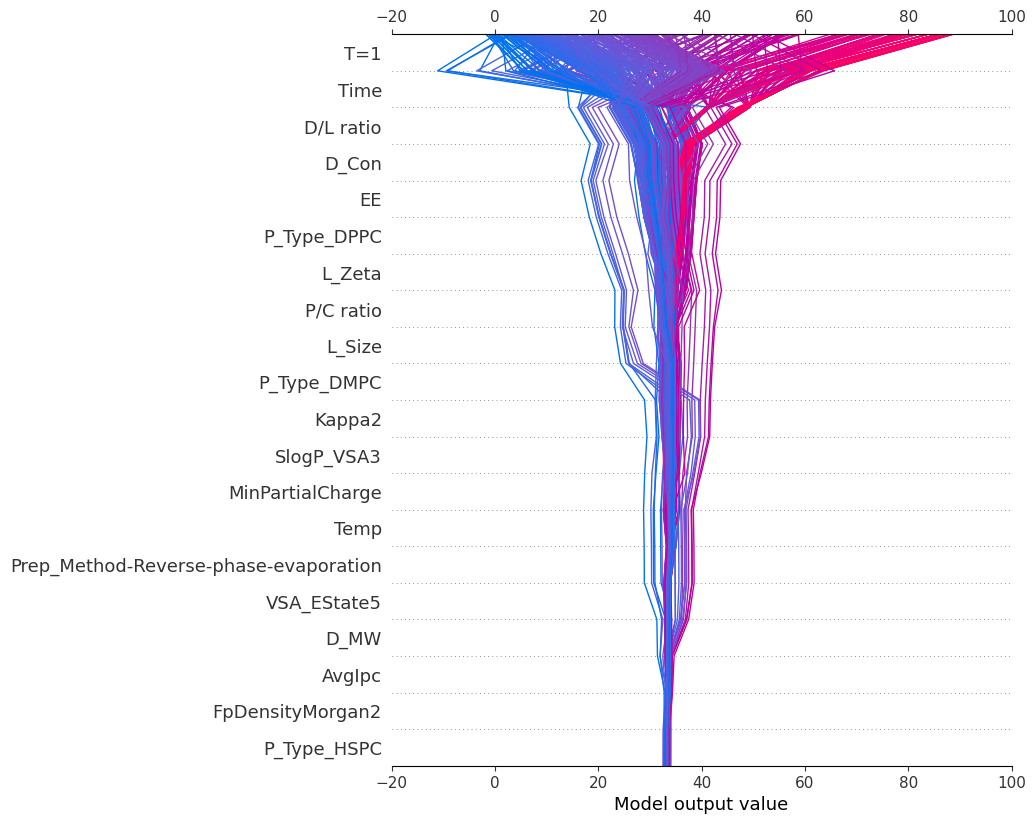

In [13]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X)


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot.png',
            dpi=600, format='png', transparent=False)
plt.show()

Doxorubicin-DPPC

In [14]:
X[0:219:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
0,543.5,0.200,242.1,35.10,52.50,48,4.2000,0,0,0,...,15.0,0.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
1,543.5,0.200,242.1,35.10,52.50,48,4.2000,0,0,0,...,15.0,0.6,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
2,543.5,0.200,242.1,35.10,52.50,48,4.2000,0,0,0,...,15.0,1.2,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
3,543.5,0.200,242.1,35.10,52.50,48,4.2000,0,0,0,...,15.0,1.8,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
4,543.5,0.200,242.1,35.10,52.50,48,4.2000,0,0,0,...,15.0,2.4,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
214,580.0,0.435,117.1,34.46,87.16,37,0.0097,0,0,0,...,16.0,66.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
215,580.0,0.435,117.1,34.46,87.16,37,0.0097,0,0,0,...,16.0,68.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
216,580.0,0.435,117.1,34.46,87.16,37,0.0097,0,0,0,...,16.0,70.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
217,580.0,0.435,117.1,34.46,87.16,37,0.0097,0,0,0,...,16.0,71.0,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013


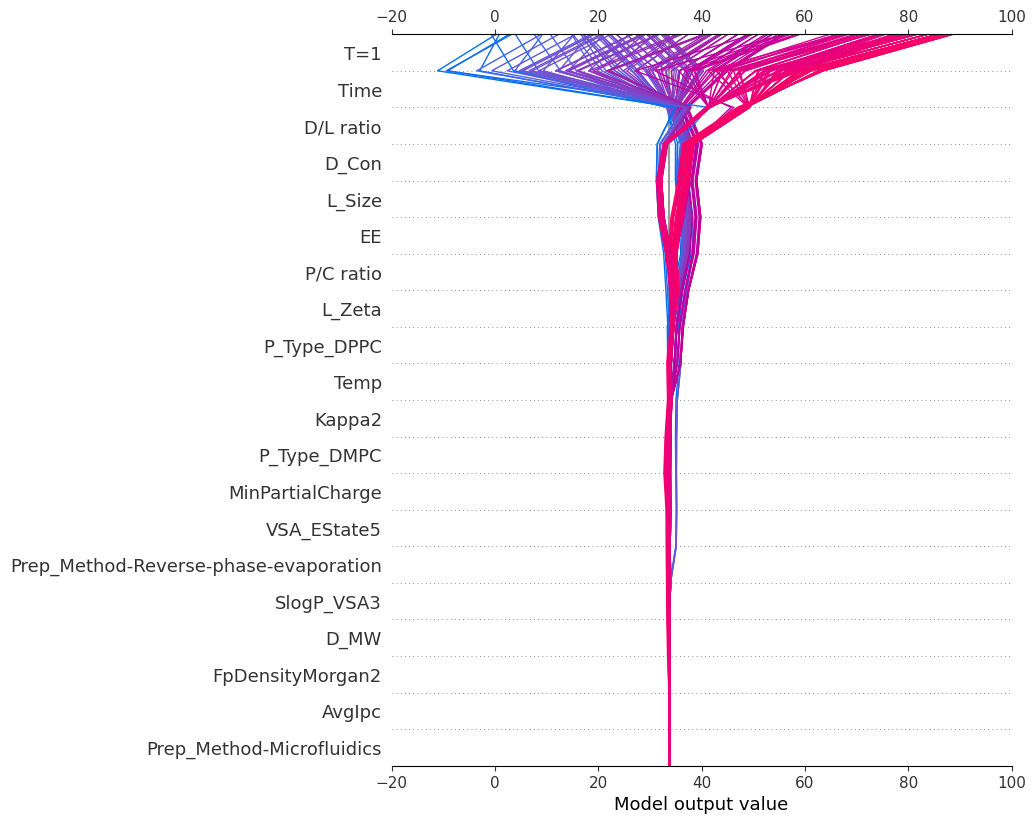

In [15]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[0:219:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Doxorubicin-DPPC.png',
            dpi=600, format='png', transparent=False)
plt.show()

Doxorubicin-HSPC

In [16]:
X[219:286:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
219,543.5,1.9,124.8,17.0,99.0,37,0.11,1,0,0,...,2.5,0.00,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
220,543.5,1.9,124.8,17.0,99.0,37,0.11,1,0,0,...,2.5,0.57,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
221,543.5,1.9,124.8,17.0,99.0,37,0.11,1,0,0,...,2.5,1.00,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
222,543.5,1.9,124.8,17.0,99.0,37,0.11,1,0,0,...,2.5,2.00,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
223,543.5,1.9,124.8,17.0,99.0,37,0.11,1,0,0,...,2.5,3.25,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281,544.5,1.6,446.0,17.3,87.0,37,0.11,1,0,0,...,1.0,19.58,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
282,544.5,1.6,446.0,17.3,87.0,37,0.11,1,0,0,...,1.0,20.78,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
283,544.5,1.6,446.0,17.3,87.0,37,0.11,1,0,0,...,1.0,22.00,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013
284,544.5,1.6,446.0,17.3,87.0,37,0.11,1,0,0,...,1.0,23.32,-0.506848,0.293148,2.230769,3.213342,9.662463,20.641188,-12.468303,0.0013


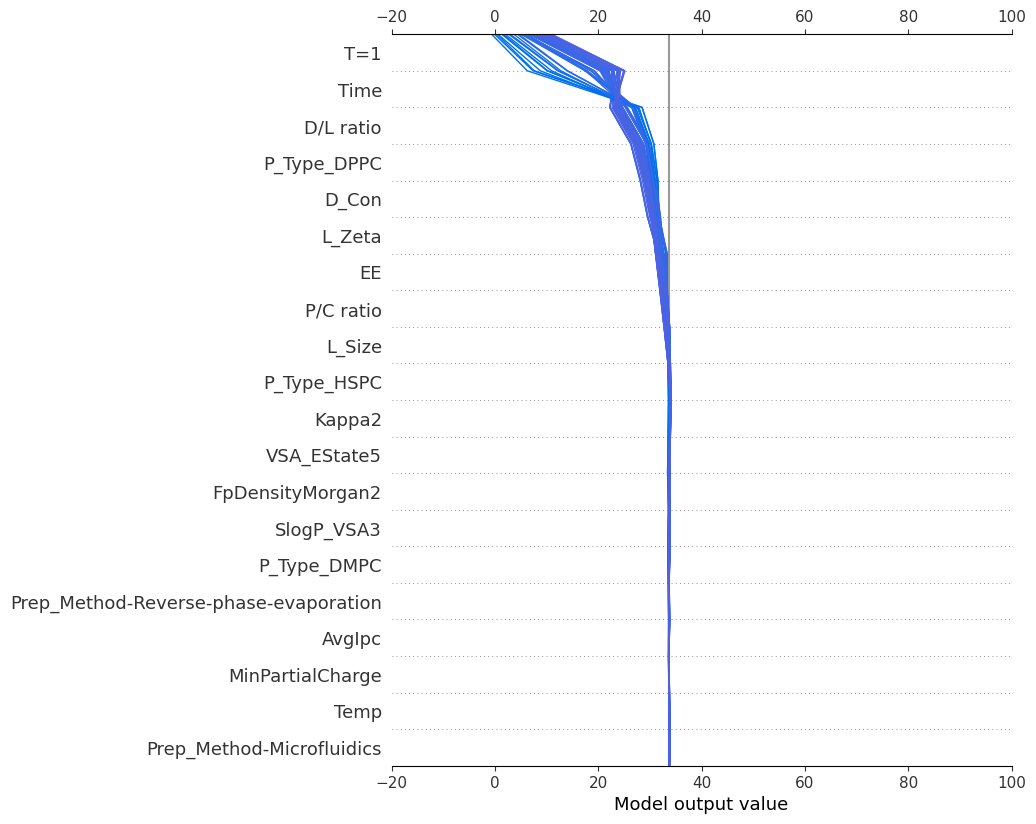

In [17]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[219:286:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Doxorubicin-HSPC.png',
            dpi=600, format='png', transparent=False)
plt.show()

Paclitaxel-DPPC

In [18]:
X[286:296:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
286,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,0.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
287,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,24.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
288,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,29.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
289,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,34.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
290,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,36.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
291,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,39.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
292,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,44.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
293,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,48.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
294,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,53.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
295,853.9,0.08,153.0,11.0,91.0,37,0.083,0,0,0,...,0.0,60.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357


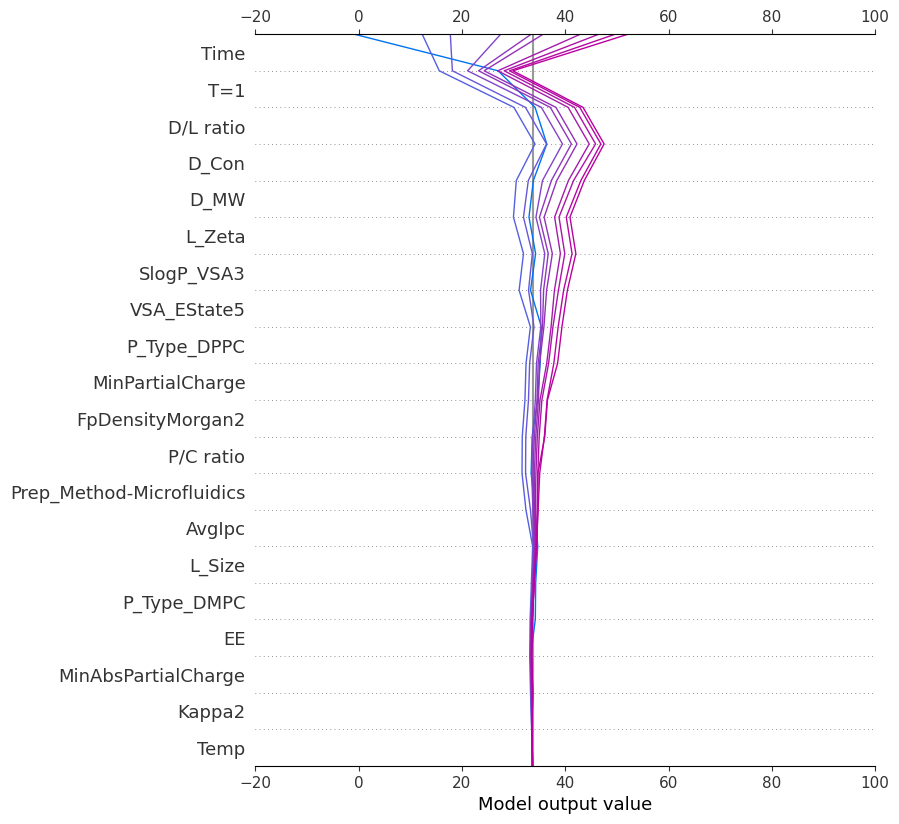

In [31]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[286:296:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Paclitaxel-DPPC.png',
            dpi=600, format='png', transparent=False)
plt.show()

Paclitaxel-DMPC

In [20]:

X[296:306:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
296,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,0.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
297,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,24.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
298,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,29.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
299,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,34.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
300,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,36.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
301,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,39.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
302,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,44.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
303,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,48.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
304,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,53.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357
305,853.9,0.08,187.0,10.0,88.0,37,0.083,0,0,1,...,0.0,60.0,-0.455737,0.338014,1.645161,0.588111,16.512846,42.862464,-29.560993,3.7357


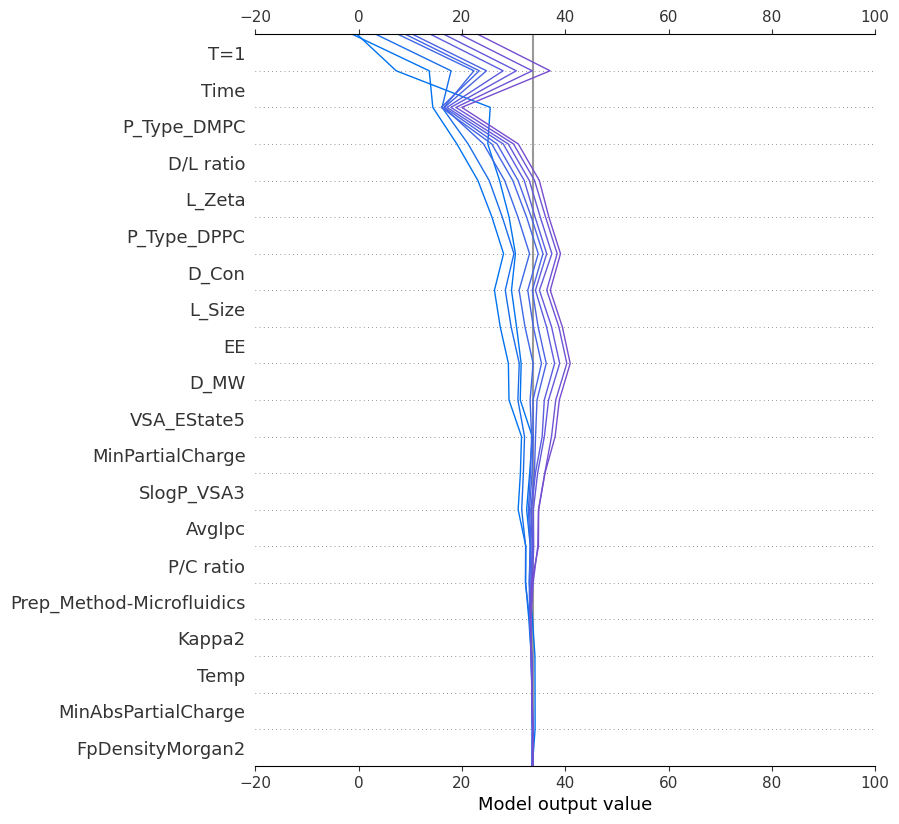

In [30]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[296:306:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Paclitaxel-DMPC.png',
            dpi=600, format='png', transparent=False)
plt.show()

Simvastatin-DPPC

In [22]:
X[306:427:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
306,418.9,2.9,115.76,34.63,70.71,37,0.1590,0,0,0,...,0.0,0.0,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
307,418.9,2.9,115.76,34.63,70.71,37,0.1590,0,0,0,...,0.0,4.0,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
308,418.9,2.9,115.76,34.63,70.71,37,0.1590,0,0,0,...,0.0,4.8,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
309,418.9,2.9,115.76,34.63,70.71,37,0.1590,0,0,0,...,0.0,5.6,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
310,418.9,2.9,115.76,34.63,70.71,37,0.1590,0,0,0,...,0.0,8.0,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422,418.9,2.9,117.10,34.46,38.61,37,0.0909,0,0,0,...,0.0,64.8,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
423,418.9,2.9,117.10,34.46,38.61,37,0.0909,0,0,0,...,0.0,66.4,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
424,418.9,2.9,117.10,34.46,38.61,37,0.0909,0,0,0,...,0.0,68.0,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856
425,418.9,2.9,117.10,34.46,38.61,37,0.0909,0,0,0,...,0.0,70.4,-0.462188,0.311287,2.4,3.104725,9.252392,19.0628,-28.187757,4.5856


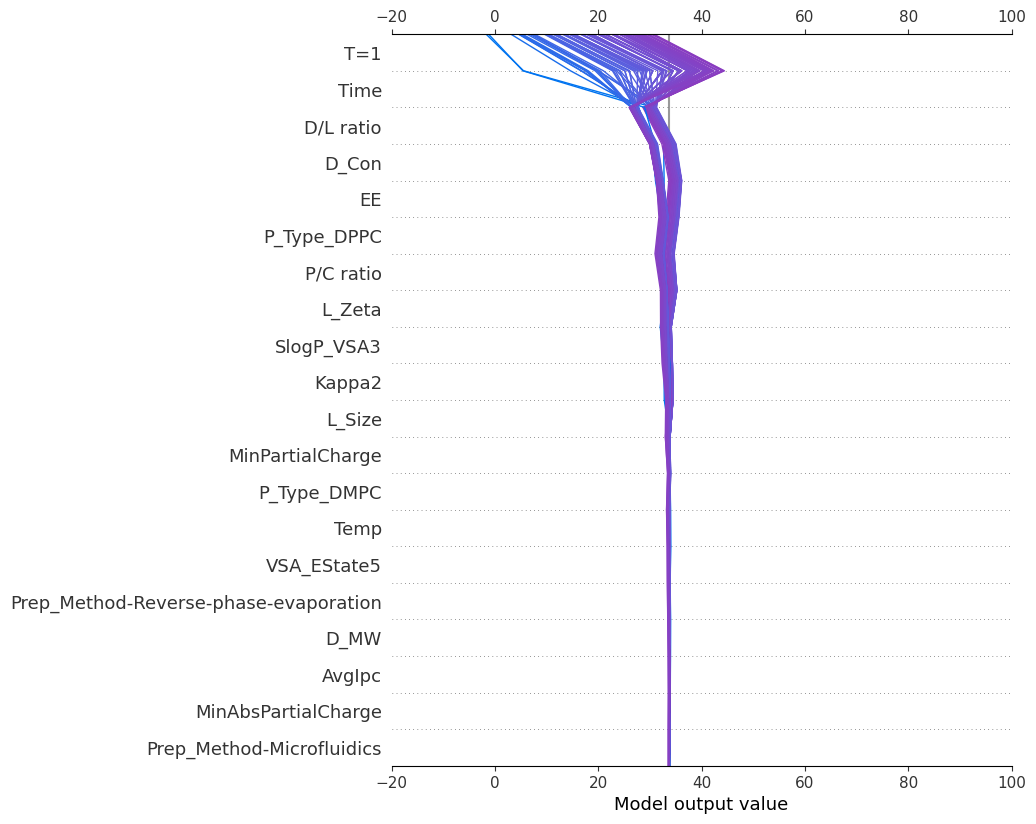

In [29]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[306:427:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Simvastatin-DPPC.png',
            dpi=600, format='png', transparent=False)
plt.show()

Cisplatin-Lecithin

In [24]:
X[427:446:]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
427,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,0.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
428,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,0.5,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
429,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,1.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
430,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,2.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
431,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,4.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
432,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,8.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
433,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,12.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
434,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,16.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
435,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,24.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005
436,300.05,1.0,142.0,4.0,25.0,25,0.486,0,1,0,...,10.5,28.0,0.114642,0.114642,1.6,1.599602,19.005779,16.480761,0.0,1.7005


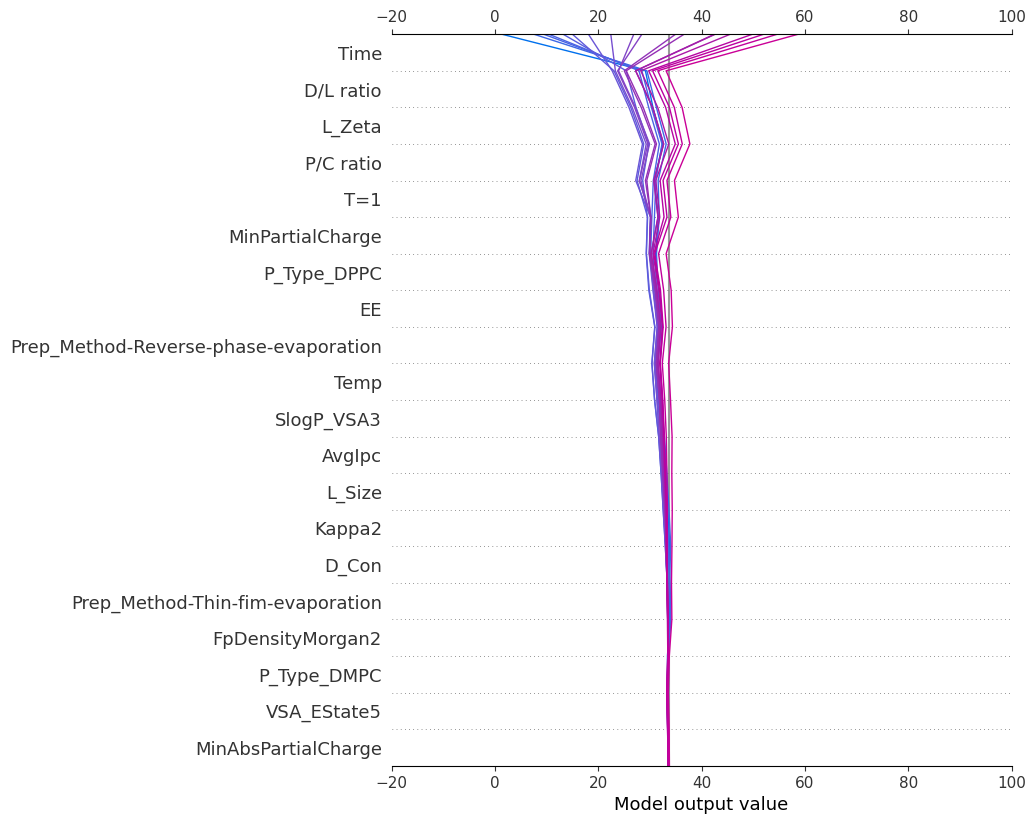

In [28]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[427:446:])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Cisplatin-Lecithin.png',
            dpi=600, format='png', transparent=False)
plt.show()

Carboplatin-Lecithin

In [26]:
X[446::]

,D_MW,D_Con,L_Size,L_Zeta,EE,Temp,D/L ratio,P_Type_HSPC,P_Type_lecithin,P_Type_DMPC,...,T=1,Time,MinPartialCharge,MinAbsPartialCharge,FpDensityMorgan2,AvgIpc,Kappa2,SlogP_VSA3,VSA_EState5,MolLogP
446,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,0.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
447,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,0.5,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
448,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,1.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
449,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,2.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
450,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,3.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
451,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,4.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
452,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,5.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
453,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,10.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
454,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,15.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576
455,371.25,1.00,240.0,25.80,71.45,37,0.058,0,1,0,...,4.00,24.0,-0.692515,0.692515,1.769231,2.471622,6.070986,30.654341,-3.907639,1.7576


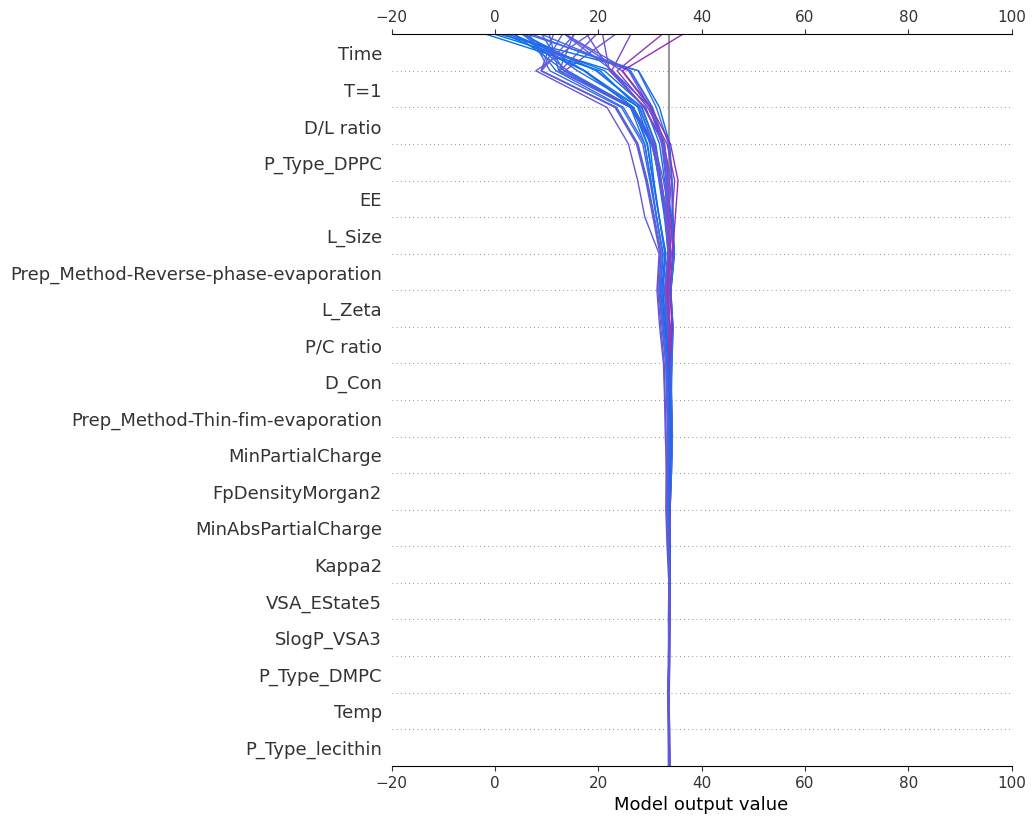

In [27]:
expected_value = explainer.expected_value
shap_values = explainer.shap_values(X[446::])


shap.decision_plot(expected_value, shap_values, feature_names=X.columns.tolist(),
                   xlim=[-20, 100], show=False, color_bar=False)

plt.savefig('ArticleFigures/NGB_Decision_plot_Carboplatin-Lecithin.png',
            dpi=600, format='png', transparent=False)
plt.show()